# 機器學習 作業1

### 作業繳交注意事項

1. 程式格(Cell)中印出的內容皆須留在上傳的ipynb檔案中，且檔案在路徑正確指向train/test資料夾時須能從頭執行到尾
2. 上傳檔名格式為[學號-姓名] (例：m11199987-王大明.ipynb)，檔名格式錯誤扣10分
3. 程式碼易讀性、資料處理完整度和結果準確率將作為評分項目

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [45]:
# 使用colab讀取Google雲端硬碟內的檔案
from google.colab import drive # import Google雲端硬碟套件
drive.mount('/content/gdrive') # 將自己的雲端硬碟掛載上去
# 透過 gdrive/My Drive/... 來存取檔案

#修改為你檔案放的路徑，gdrive/My Drive/指向雲端硬碟的根目錄，例：
# train = pd.read_csv('gdrive/My Drive/fourth/ML/Steel Plates Faults(classification)/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 任務1. 回歸

### 資料描述
資料集包含電腦設備的相關資訊，請預測其效能。

### 目標
1. 請從train.csv檔案中讀取訓練集資料進行回歸模型建模，並對test.csv內的資料進行類別預測，Y_ERP為預測目標，其餘為特徵。
2. 將程式碼依照其功能放置於「讀取資料」、「資料前處理」、「建立訓練模型」和「測試資料集上預測」儲存格內
3. 在程式碼尾端使用print()印出測試結果的MSE

##### 來源
*https://archive.ics.uci.edu/ml/datasets/Computer+Hardware*

### 程式碼

In [46]:
# ---------------- 讀取資料 -------------------
train_q1 = pd.read_csv('gdrive/My Drive/fourth/ML/Computer Hardware(regression)/train.csv')
test_q1 = pd.read_csv('gdrive/My Drive/fourth/ML/Computer Hardware(regression)/test.csv')
train_q1_y = train_q1['Y_ERP']
train_q1 = train_q1.drop(["Y_ERP"], axis=1)
test_q1_y = test_q1['Y_ERP']
test_q1 = test_q1.drop(['Y_ERP'], axis=1)

In [47]:
# ---------------- 資料前處理 -------------------
labelencoder = LabelEncoder()
data = pd.concat([train_q1, test_q1],axis=0, ignore_index=True)
data['Vendor_Name'] = labelencoder.fit_transform(data['Vendor_Name'])
data['Model_Name'] = labelencoder.fit_transform(data['Model_Name'])
zscore = preprocessing.StandardScaler()
data = pd.DataFrame(zscore.fit_transform(data))
data.columns = ['Vendor_Name', 'Model_Name','MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']
train_q1_ohe = data[0:188]
test_q1_ohe = data[188:]
train_q1_ohe

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,1.614213,-1.259688,-0.303586,-0.224316,-0.324500,-0.621882,-0.396851,-0.164563,-0.334207
1,0.142148,-0.082874,0.755575,-0.224316,-0.666425,-0.621882,-0.543911,-0.665815,-0.458860
2,0.142148,0.066299,0.081563,-0.224316,-0.666425,-0.424504,-0.249791,-0.473026,-0.446395
3,-1.463741,0.530395,-0.361359,0.059962,-0.478366,-0.621882,0.191389,1.763330,-0.184623
4,-1.329916,1.425436,0.447455,-0.675026,-0.580943,-0.523193,-0.543911,-0.473026,-0.490023
...,...,...,...,...,...,...,...,...,...
183,-1.463741,0.430946,-0.234259,-0.608867,-0.580943,-0.621882,0.338449,0.529479,-0.483790
184,-1.196092,-1.524885,-0.592448,-0.224316,0.359350,-0.424504,-0.249791,-0.473026,-0.284346
185,1.212740,-0.911616,-0.168784,-0.608867,-0.666425,-0.572537,-0.543911,-0.511583,-0.471325
186,-1.463741,0.414371,-0.141823,-0.605766,-0.837387,-0.424504,-0.102731,-0.126005,-0.539884


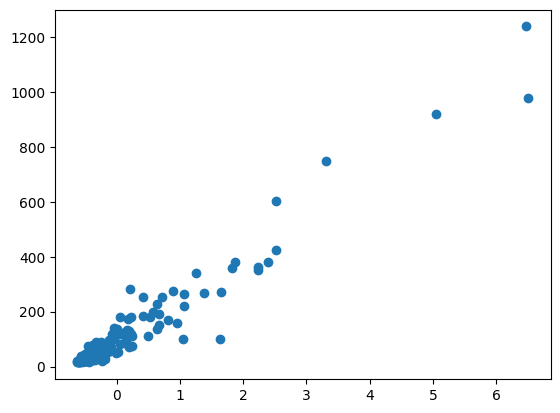

In [48]:
# 畫圖確認各x對y的影響
# 只有PRP有明顯線性關係，保留['PRP']
plt.scatter(train_q1_ohe['PRP'], train_q1_y)
plt.show()

In [49]:
train_q1_X = train_q1_ohe[['PRP']]

In [50]:
# ---------------- 建立訓練模型 -------------------
model = LinearRegression()
model.fit(train_q1_X, train_q1_y)
print("model intercept = ", model.intercept_)
print("coef = ", model.coef_)

model intercept =  99.44826071157313
coef =  [149.39275884]


In [51]:
# ---------------- 在測試資料集上預測 -------------------
test_q1_X = test_q1_ohe[['PRP']]
predict = model.predict(test_q1_X)
df_q1 = pd.DataFrame({'Actual' : test_q1_y, 'Predicted' : predict})
df_q1.head(5)

,Actual,Predicted
0,24,38.346812
1,20,16.000121
2,107,70.004624
3,47,32.760139
4,74,49.520157


In [52]:
# ---------------- 印出測試結果MSE -------------------
print('Mean Squared Error: ', mean_squared_error(test_q1_y, predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_q1_y, predict)))

Mean Squared Error:  572.5034780571522
Root Mean Squared Error: 23.927044908578914


## 任務2 數值分類


### 資料描述
該資料集包含27個描述不鏽鋼板表面瑕疵幾何形狀輪廓之特徵與其瑕疵類別。

### 目標
1. 請從train.csv檔案中讀取訓練集資料進行分類模型建模，並對test.csv內的資料進行類別預測，Y_defect_type為預測目標，其餘為特徵。
2. 將程式碼依照其功能放置於「讀取資料」、「資料前處理」、「建立訓練模型」和「測試資料集上預測」儲存格內
3. 在程式碼尾端使用print()印出測試結果準確率

##### 來源
*https://archive.ics.uci.edu/ml/datasets/steel+plates+faults*

### 程式碼

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [54]:
# ---------------- 讀取資料 -------------------
train_q2 = pd.read_csv('gdrive/My Drive/fourth/ML/Steel Plates Faults(classification)/train.csv')
test_q2 = pd.read_csv('gdrive/My Drive/fourth/ML/Steel Plates Faults(classification)/test.csv')
train_q2_y = train_q2['Y_defect_type']
train_q2 = train_q2.drop(["Y_defect_type"], axis=1)
test_q2_y = test_q2['Y_defect_type']
test_q2 = test_q2.drop(['Y_defect_type'], axis=1)

In [55]:
# ---------------- 資料前處理 -------------------
data_q2 = pd.concat([train_q2, test_q2],axis=0, ignore_index=True)
data_q2 = pd.DataFrame(zscore.fit_transform(data_q2))
train_q2_zs = data_q2[0:1746]
test_q2_zs = data_q2[1746:]
pca = PCA(n_components=11)
pca.fit(train_q2_zs)
X_pca = pca.transform(train_q2_zs)
X_pca_test = pca.transform(test_q2_zs)

In [56]:
# ---------------- 建立訓練模型 -------------------
# ---------------- 在測試資料集上預測 -------------------
accuracy_q2 = 0
k_highest = 0
prediction = []
for i in range(2, 8):
  knn = KNeighborsClassifier(n_neighbors = i)
  model_knn = knn.fit(X_pca, train_q2_y)
  q2_predict = model_knn.predict(X_pca_test)
  acc = accuracy_score(test_q2_y, q2_predict)
  if acc > accuracy_q2:
    accuracy_q2 = acc
    k_highest = i
    prediction = q2_predict

In [57]:
# ---------------- 印出測試結果準確率 -------------------
print('在k為', k_highest, "時, 有最高準確率 :", accuracy_q2)

在k為 5 時, 有最高準確率 : 0.8974358974358975


----------------------------------------

# Task 0 (Demo)

以鳶尾花資料集示範作業上傳格式，程式碼內容請依照題目要求撰寫。

In [58]:
# ---------------- 讀取資料 -------------------
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

iris = load_iris()

In [59]:
# ---------------- 資料前處理 -------------------
# 讀取特徵
X = iris.data
# 讀取特徵
y = iris.target

iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

In [60]:
# ---------------- 建立訓練模型 -------------------
lr = LogisticRegression()
model = lr.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# ---------------- 在測試資料集上預測 -------------------
accuracy = model.score(X, y)

In [62]:
# ---------------- 印出測試結果準確率 -------------------
print('測試結果準確率: ', accuracy)

測試結果準確率:  0.9733333333333334
